# 強化学習におけるmax作用素

---

今回は強化学習のオフポリシー方策のアルゴリズム(Value Iteration,DQNなど)において使用するmax作用素について説明していきます.

またこちらの[論文](https://arxiv.org/pdf/1612.05628)はmax作用素の代わりにmellowmax作用素を使うといいよと言っている論文です．

興味があれば読んでみてください．

---



まず，端的に結論から言うと，max作用素を使用することはあまり良くないことが知られています．

理由はいくつかあるのですが，現実世界などで強化学習を適用するときなどはノイズが発生し，最適な状態行動対の状態行動価値関数 $Q^*(s,a)$ の値が学習段階で1番ではなく僅差で2番目に大きくなってしまったりすると，わずかながらの差というものを考慮せず間違って最適だとみなされた状態価値関数が正しくない方向に学習を進める場合があります．

---

例を下で出します．

今回は行動が2つ ($a_1,a_2$) があり, $a_1$ を最適な行動とします．

[array([0.47051402]), array([0.60805247]), array([0.49134326]), array([-0.1]), array([-0.1]), array([1.31126845]), array([1.39920002]), array([1.8423774]), array([0.85378545]), array([-0.1]), array([-0.1]), array([0.16142626]), array([-0.1]), array([1.766909]), array([-0.1]), array([2.10306518]), array([-0.1]), array([0.78028118]), array([-0.1]), array([-0.1]), array([-0.1]), array([0.31939382]), array([-0.1]), array([0.31086027]), array([-0.1]), array([-0.1]), array([1.49029746]), array([-0.1]), array([-0.1]), array([2.11743148]), array([-0.1]), array([0.22579831]), array([0.48219489]), array([0.92778983]), array([1.07248628]), array([0.78105906]), array([3.05746599]), array([-0.1]), array([1.76638646]), array([3.03286043]), array([0.53446343]), array([-0.1]), array([-0.1]), array([-0.1]), array([1.49539233]), array([-0.1]), array([-0.1]), array([-0.1]), array([1.03182613]), array([0.26072107]), array([-0.1]), array([-0.1]), array([1.60264081]), array([0.35774918]), array([0.78655285]

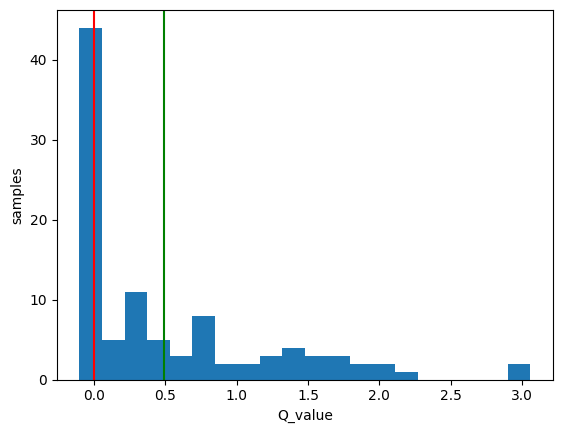

In [31]:
import matplotlib.pyplot as plt
import numpy as np

samples = 100
action = 2

Q_list = []

for _ in range(samples):
    #平均を0でノイズとして標準誤差を考慮
    Q = np.random.randn(action-1)
    Q_list.append(max(Q,np.array([-0.1])))
print(Q_list)
Q_list = np.array(Q_list)
plt.hist(Q_list,bins=20)
plt.xlabel('Q_value')
plt.ylabel('samples')
plt.axvline(x=0,color='red')
plt.axvline(x=Q_list.mean(),color='green')


上のアルゴリズムはQ関数が0である時を最適として考えています．

標準誤差をノイズとしても考えて100個の $max$ 作用素を使った時の期待値を求めると，本来なら期待値は0になって欲しいのですが，ノイズを考慮して，過大評価していますね．

max作用素を使ってしまうと緑の線以外の場所の情報を考慮せずに学習が進んでしまい，ノイズなどが入ると良くないことがわかりますね．